In [1]:
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install pandas

   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
    --------------------------------------- 0.3/12.6 MB ? eta -:--:--
   ---- ----------------------------------- 1.3/12.6 MB 3.2 MB/s eta 0:00:04
   ------ --------------------------------- 2.1/12.6 MB 3.7 MB/s eta 0:00:03
   --------- ------------------------------ 3.1/12.6 MB 3.9 MB/s eta 0:00:03
   ------------ --------------------------- 3.9/12.6 MB 4.1 MB/s eta 0:00:03
   -------------- ------------------------- 4.7/12.6 MB 3.9 MB/s eta 0:00:03
   ----------------- ---------------------- 5.5/12.6 MB 3.8 MB/s eta 0:00:02
   ------------------- -------------------- 6.3/12.6 MB 3.9 MB/s eta 0:00:02
   ----------------------- ---------------- 7.3/12.6 MB 3.9 MB/s eta 0:00:02
   -------------------------- ------------- 8.4/12.6 MB 3.9 MB/s eta 0:00:02
   ----------------------------- ---------- 9.2/12.6 MB 4.0 MB/s eta 0:00:01
   -----------------

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Data

In [3]:
customers_df = pd.read_csv('Customers.csv')
products_df = pd.read_csv('Products.csv')
transactions_df = pd.read_csv('Transactions.csv')

Initial Data Exploration

In [4]:
# Check first few rows
print(customers_df.head())
print(products_df.head())
print(transactions_df.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [5]:
# Data summary
print(customers_df.info())
print(products_df.info())
print(transactions_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

Data Cleaning

In [7]:
# Check for missing values
print(customers_df.isnull().sum())
print(products_df.isnull().sum())
print(transactions_df.isnull().sum())

# Check for duplicates
print(customers_df.duplicated().sum())
print(products_df.duplicated().sum())
print(transactions_df.duplicated().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64
0
0
0


Merge the Dataframe

In [8]:
transactions_customers = pd.merge(transactions_df, customers_df, on='CustomerID', how='left')
transactions_full = pd.merge(transactions_customers, products_df, on='ProductID', how='left')

Exploratory Data Analysis

In [9]:
# Descriptive statistics
print(transactions_full.describe())

# Summary of categorical features
print(transactions_full['Region'].value_counts())
print(transactions_full['Category'].value_counts())

          Quantity   TotalValue     Price_x     Price_y
count  1000.000000  1000.000000  1000.00000  1000.00000
mean      2.537000   689.995560   272.55407   272.55407
std       1.117981   493.144478   140.73639   140.73639
min       1.000000    16.080000    16.08000    16.08000
25%       2.000000   295.295000   147.95000   147.95000
50%       3.000000   588.880000   299.93000   299.93000
75%       4.000000  1011.660000   404.40000   404.40000
max       4.000000  1991.040000   497.76000   497.76000
Region
South America    304
North America    244
Europe           234
Asia             218
Name: count, dtype: int64
Category
Books          270
Electronics    254
Home Decor     248
Clothing       228
Name: count, dtype: int64


Visualize the Data

1. Distribution of transaction amounts:

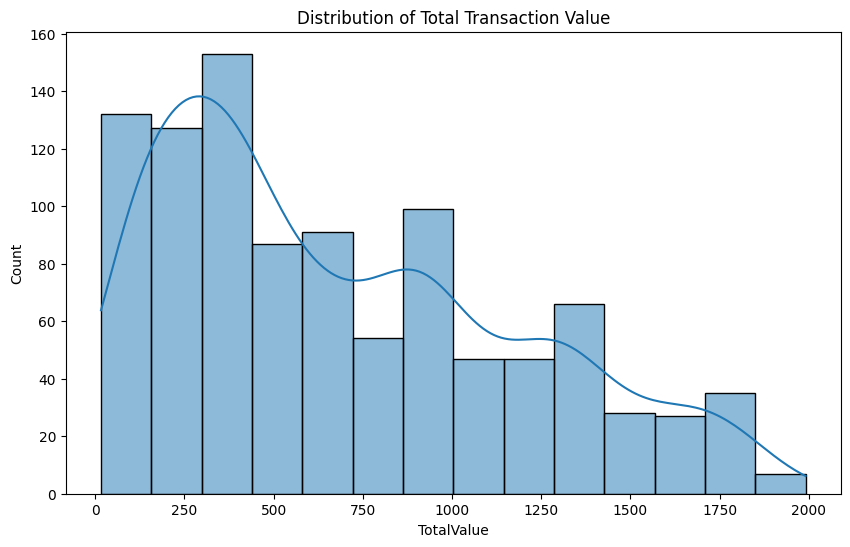

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(transactions_full['TotalValue'], kde=True)
plt.title('Distribution of Total Transaction Value')
plt.show()

2. Total sales by Region:

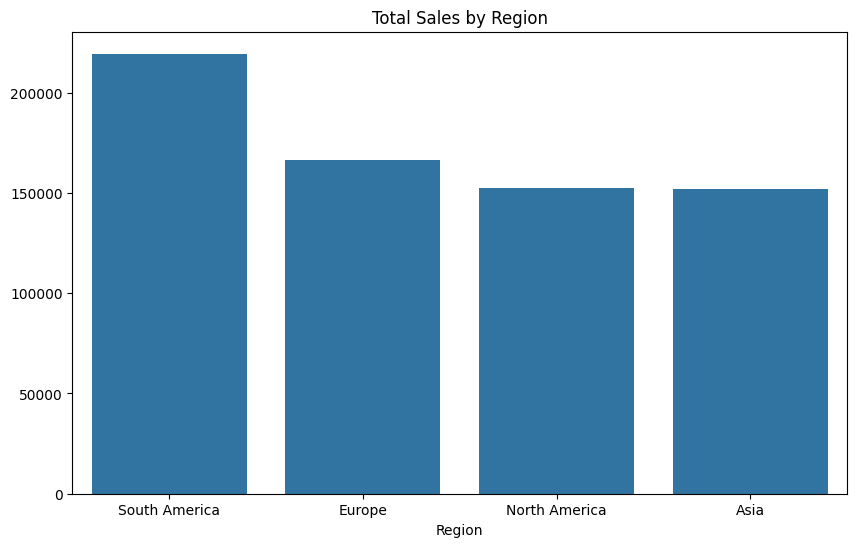

In [11]:
region_sales = transactions_full.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=region_sales.index, y=region_sales.values)
plt.title('Total Sales by Region')
plt.show()

3. Total sales by Product Category:

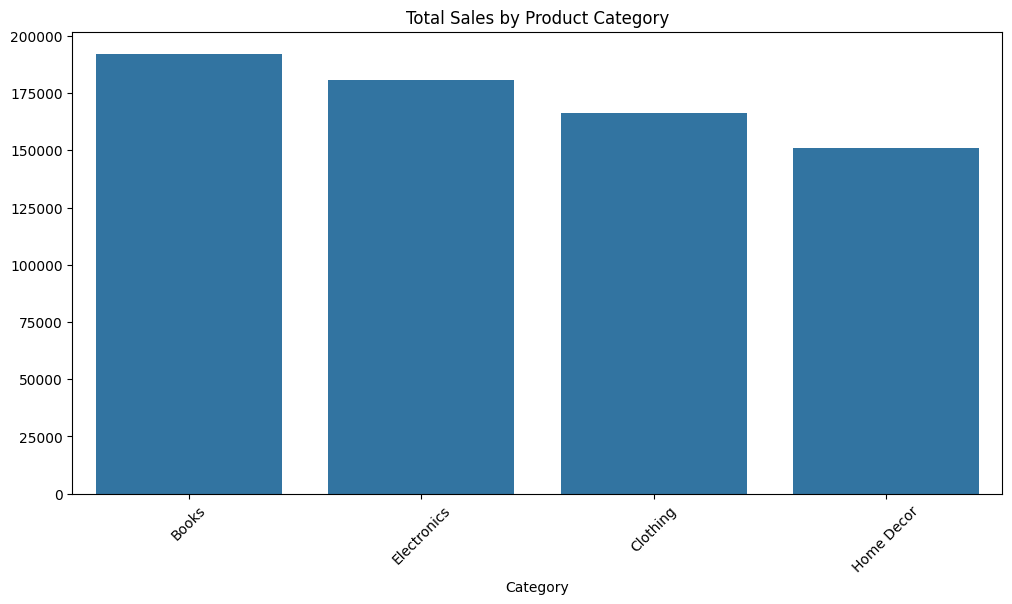

In [12]:
category_sales = transactions_full.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title('Total Sales by Product Category')
plt.xticks(rotation=45)
plt.show()

4. Top 10 products by sales:

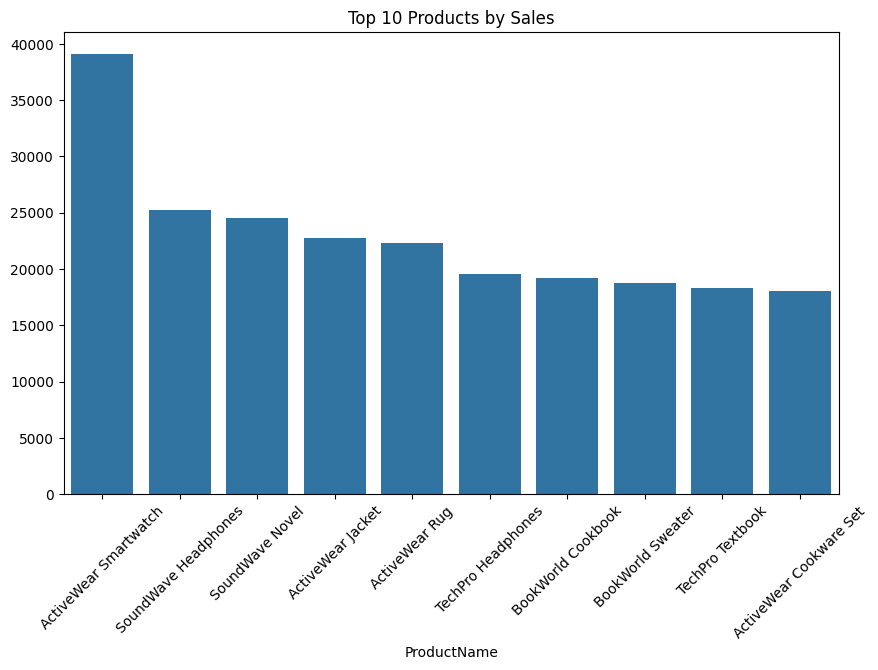

In [13]:
product_sales = transactions_full.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=product_sales.index, y=product_sales.values)
plt.title('Top 10 Products by Sales')
plt.xticks(rotation=45)
plt.show()

In [14]:
transactions_full.to_csv('Processed_Transactions.csv', index=False)